<a href="https://colab.research.google.com/github/jhportfolio1/python/blob/main/python_9_Python_Cognitive_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Python을 이용해 Cognitive Computer Vision 활용하기

## 1) Congnitive Computer Vision 계정 생성 후 구글에서 이미지 주소 저장

## 2) 저장한 이미지 **가져오기**

- computer vision image analysis (컴퓨터 시각 이미지 분석)

In [10]:
import requests

### (1) image url 은 계속 바뀔 수 있으므로, 따옴표 안에 표시

In [11]:
image_url = 'https://post-phinf.pstatic.net/MjAxODEwMjBfMTY3/MDAxNTQwMDM0MDE1MTE0.c6ujK5x38_i9aW0PR3albEbyS70ybmgvLbuLSUmFcqAg.H382kysh1iU1UQz1RN12L0iAcsS-StCfqdH4bWjj6oMg.JPEG/cm08266469.jpg?type=w1200'
requests.get(image_url)

<Response [200]>

In [12]:
image_url = 'https://post-phinf.pstatic.net/MjAxODEwMjBfMTY3/MDAxNTQwMDM0MDE1MTE0.c6ujK5x38_i9aW0PR3albEbyS70ybmgvLbuLSUmFcqAg.H382kysh1iU1UQz1RN12L0iAcsS-StCfqdH4bWjj6oMg.JPEG/cm08266469.jpg?type=w1200'
response = requests.get(image_url)
response

<Response [200]>

- reponse.content 로 보면, 바이너리 파일을 16진수로 표기함을 알 수 있음

In [13]:
image_url = 'https://post-phinf.pstatic.net/MjAxODEwMjBfMTY3/MDAxNTQwMDM0MDE1MTE0.c6ujK5x38_i9aW0PR3albEbyS70ybmgvLbuLSUmFcqAg.H382kysh1iU1UQz1RN12L0iAcsS-StCfqdH4bWjj6oMg.JPEG/cm08266469.jpg?type=w1200'
response = requests.get(image_url)
response.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc0\x00\x11\x08\x02\xf9\x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x01\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x06\x07\x01\x08\t\xff\xc4\x00M\x10\x00\x01\x03\x02\x04\x04\x03\x06\x04\x04\x04\x04\x03\x07\x02\x07\x01\x00\x02\x03\x04\x11\x05\x12!1\x06\x13AQ"aq\x07\x142\x81\x91\xa1#B\xb1\xc1\x08R\xd1\xf0\x153r\xe14b\x82\xf1$s\x92\x165CS\

- 16진수를 바이트 단위로 재조립해야 함

### (2) 재조립

- 재조립 실시

In [14]:
import requests
from io import BytesIO

In [15]:
image_url = 'https://post-phinf.pstatic.net/MjAxODEwMjBfMTY3/MDAxNTQwMDM0MDE1MTE0.c6ujK5x38_i9aW0PR3albEbyS70ybmgvLbuLSUmFcqAg.H382kysh1iU1UQz1RN12L0iAcsS-StCfqdH4bWjj6oMg.JPEG/cm08266469.jpg?type=w1200'
response = requests.get(image_url)
img = BytesIO(response.content)
img

데이터는 잘 조립되었으나, 바이너리로 표시됨

- 이미지로 출력 필요

In [16]:
import requests
from io import BytesIO
from PIL import Image

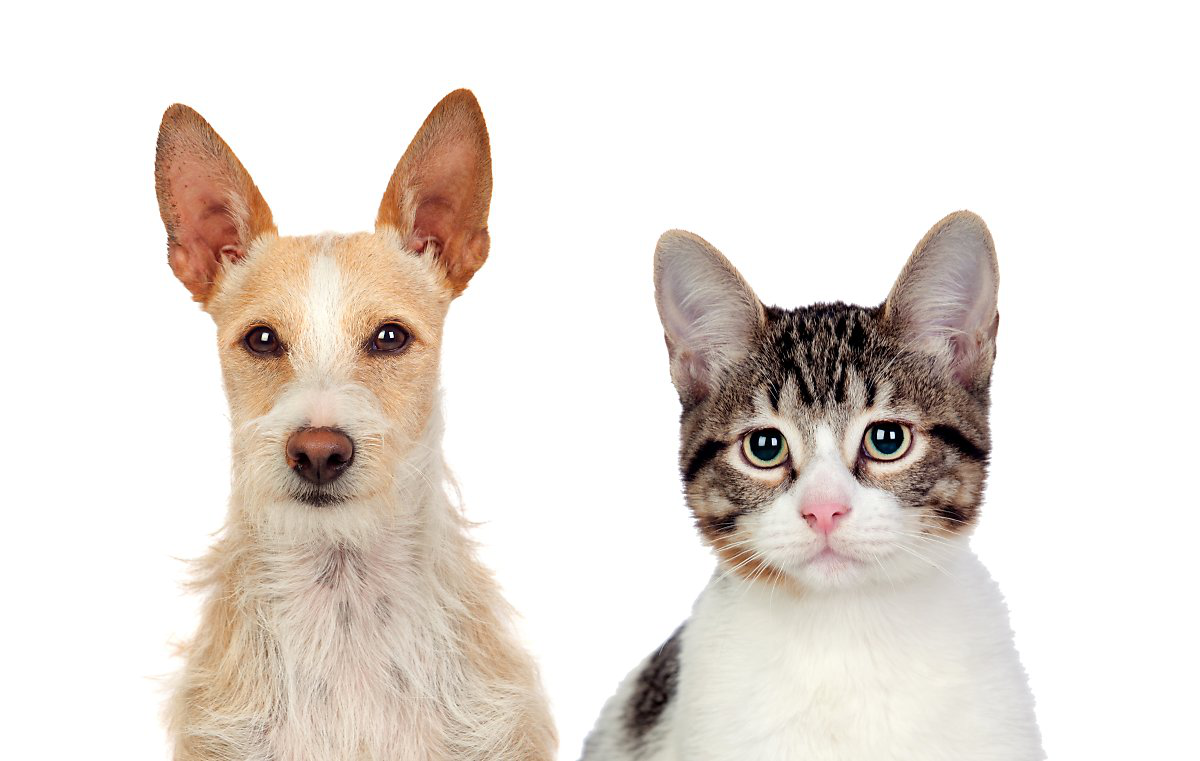

In [17]:
image_url = 'https://post-phinf.pstatic.net/MjAxODEwMjBfMTY3/MDAxNTQwMDM0MDE1MTE0.c6ujK5x38_i9aW0PR3albEbyS70ybmgvLbuLSUmFcqAg.H382kysh1iU1UQz1RN12L0iAcsS-StCfqdH4bWjj6oMg.JPEG/cm08266469.jpg?type=w1200'
response = requests.get(image_url)
img = BytesIO(response.content)
image = Image.open(img)
image

### (4) 필요값을 준비한다

- key = '' (Azure의 키를 넣기)
- endpoint = '' (Azure의 엔드포인트 넣기) + 'vision 버전'

In [18]:
key = '22d0c150407d4d4b83aec3cfe780b284'
endpoint = 'https://labuser97computervision1.cognitiveservices.azure.com/' + 'vision/v3.0/'

### (5) 이미지 분석을 실시한다.

In [19]:
analyze_endpoint = endpoint + 'analyze'
detect_endpoint = endpoint + 'detect'

- 웹 통신에서는 3가지 요소가 필요함 (헤더, 파라미터, 데이터)

In [20]:
header = {'Ocp-Apim-Subscription-Key' : key}
params = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url':image_url}

- 분석을 요청한다.

In [21]:
response = requests.post(analyze_endpoint, headers=header, params=params, json=data)

- 요청한 값을 가져온다.

In [22]:
result = response.json()
result

{'categories': [{'name': 'animal_cat', 'score': 0.99609375}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': '935838',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['sitting',
   'cat',
   'animal',
   'mammal',
   'indoor',
   'brown',
   'dog',
   'camera',
   'small',
   'looking',
   'standing',
   'front',
   'table',
   'laying',
   'posing',
   'close'],
  'captions': [{'text': 'a close up of a dog and a cat looking at the camera',
    'confidence': 0.8056452480363262}]},
 'requestId': '1d287393-e5d2-43d1-9066-d5705b5b945d',
 'metadata': {'height': 761, 'width': 1200, 'format': 'Jpeg'}}

### (6) 분석된 텍스트 결과를 가져온다

- 텍스트가 있는 Description과 caption 먼저 출력해보기

In [23]:
result['description']['captions'][0]

{'text': 'a close up of a dog and a cat looking at the camera',
 'confidence': 0.8056452480363262}

- 텍스트만 가져오고 싶은 경우 : description - caption에서 첫번째에 위치'[0]'한 text를 표시

In [24]:
result['description']['captions'][0]['text']

'a close up of a dog and a cat looking at the camera'

### (7) 활용분야

- 사용자가 SNS에 올리는 사진을 분석해서 광고에 사용

---
.

# 2. Object Detection

## 1) 위에서 사용한 값을 이용해 Object Detection을 진행한다.

- analyze : 이미지 분석
- detect : 분석해서 좌표까지 찍어줌

In [25]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {}         #Object Detection에는 parameter 없음
data = {'url':image_url}


In [26]:
response = requests.post(detect_endpoint, headers = headers, params=params, json=data)

In [27]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 105, 'y': 102, 'w': 462, 'h': 651},
   'object': 'dog',
   'confidence': 0.796,
   'parent': {'object': 'mammal',
    'confidence': 0.833,
    'parent': {'object': 'animal', 'confidence': 0.834}}},
  {'rectangle': {'x': 591, 'y': 187, 'w': 455, 'h': 556},
   'object': 'cat',
   'confidence': 0.903,
   'parent': {'object': 'mammal',
    'confidence': 0.905,
    'parent': {'object': 'animal', 'confidence': 0.905}}}],
 'requestId': 'c6ec9d7e-0824-45c1-ae05-989069ba0685',
 'metadata': {'height': 761, 'width': 1200, 'format': 'Jpeg'}}

## 2) 좌표 값 확인하기

In [28]:
def MakeBox(res):
  print(res)

In [29]:
MakeBox(result)

{'objects': [{'rectangle': {'x': 105, 'y': 102, 'w': 462, 'h': 651}, 'object': 'dog', 'confidence': 0.796, 'parent': {'object': 'mammal', 'confidence': 0.833, 'parent': {'object': 'animal', 'confidence': 0.834}}}, {'rectangle': {'x': 591, 'y': 187, 'w': 455, 'h': 556}, 'object': 'cat', 'confidence': 0.903, 'parent': {'object': 'mammal', 'confidence': 0.905, 'parent': {'object': 'animal', 'confidence': 0.905}}}], 'requestId': 'c6ec9d7e-0824-45c1-ae05-989069ba0685', 'metadata': {'height': 761, 'width': 1200, 'format': 'Jpeg'}}


### (1) object 확인하기

In [30]:
def MakeBox(res):
  objects = res['objects']
  for obj in objects:
    print(obj)

In [31]:
MakeBox(result)

{'rectangle': {'x': 105, 'y': 102, 'w': 462, 'h': 651}, 'object': 'dog', 'confidence': 0.796, 'parent': {'object': 'mammal', 'confidence': 0.833, 'parent': {'object': 'animal', 'confidence': 0.834}}}
{'rectangle': {'x': 591, 'y': 187, 'w': 455, 'h': 556}, 'object': 'cat', 'confidence': 0.903, 'parent': {'object': 'mammal', 'confidence': 0.905, 'parent': {'object': 'animal', 'confidence': 0.905}}}


### (2) 좌표 확인하기1

In [32]:
def MakeBox(res):
  objects = res['objects']
  for obj in objects:
    rect = obj['rectangle']
    print(rect)

In [33]:
MakeBox(result)

{'x': 105, 'y': 102, 'w': 462, 'h': 651}
{'x': 591, 'y': 187, 'w': 455, 'h': 556}


### (3) 좌표 확인하기2

In [34]:
def MakeBox(res):
  objects = res['objects']
  for obj in objects:
    rect = obj['rectangle']
    print(rect)
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

In [35]:
MakeBox(result)

{'x': 105, 'y': 102, 'w': 462, 'h': 651}
{'x': 591, 'y': 187, 'w': 455, 'h': 556}


## 3) 이미지 다루기

In [36]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {}         #Object Detection에는 parameter 없음
data = {'url':image_url}


In [37]:
response = requests.post(detect_endpoint, headers = headers, params=params, json=data)

In [38]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 105, 'y': 102, 'w': 462, 'h': 651},
   'object': 'dog',
   'confidence': 0.796,
   'parent': {'object': 'mammal',
    'confidence': 0.833,
    'parent': {'object': 'animal', 'confidence': 0.834}}},
  {'rectangle': {'x': 591, 'y': 187, 'w': 455, 'h': 556},
   'object': 'cat',
   'confidence': 0.903,
   'parent': {'object': 'mammal',
    'confidence': 0.905,
    'parent': {'object': 'animal', 'confidence': 0.905}}}],
 'requestId': 'b8f54326-8d4b-48ac-a507-962529f2838d',
 'metadata': {'height': 761, 'width': 1200, 'format': 'Jpeg'}}

- 이미지 사이즈가 크므로, 표현하기 위한 코드가 필요하다

In [39]:
from PIL import Image, ImageDraw, ImageFont

- 이미지를 Draw 파일로 변환한다.

In [40]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

- 사각형, 좌표, 컬러 표기한다.
> 사각형에는 2개의 점 필요 : 점은 튜플 타입으로 표기(x,y), (x+w,y+h)

In [41]:
def MakeBox(res):
  objects = res['objects']
  for obj in objects:
    rect = obj['rectangle']
    print(rect)
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)), outline='red')

In [42]:
MakeBox(result)

{'x': 105, 'y': 102, 'w': 462, 'h': 651}
{'x': 591, 'y': 187, 'w': 455, 'h': 556}


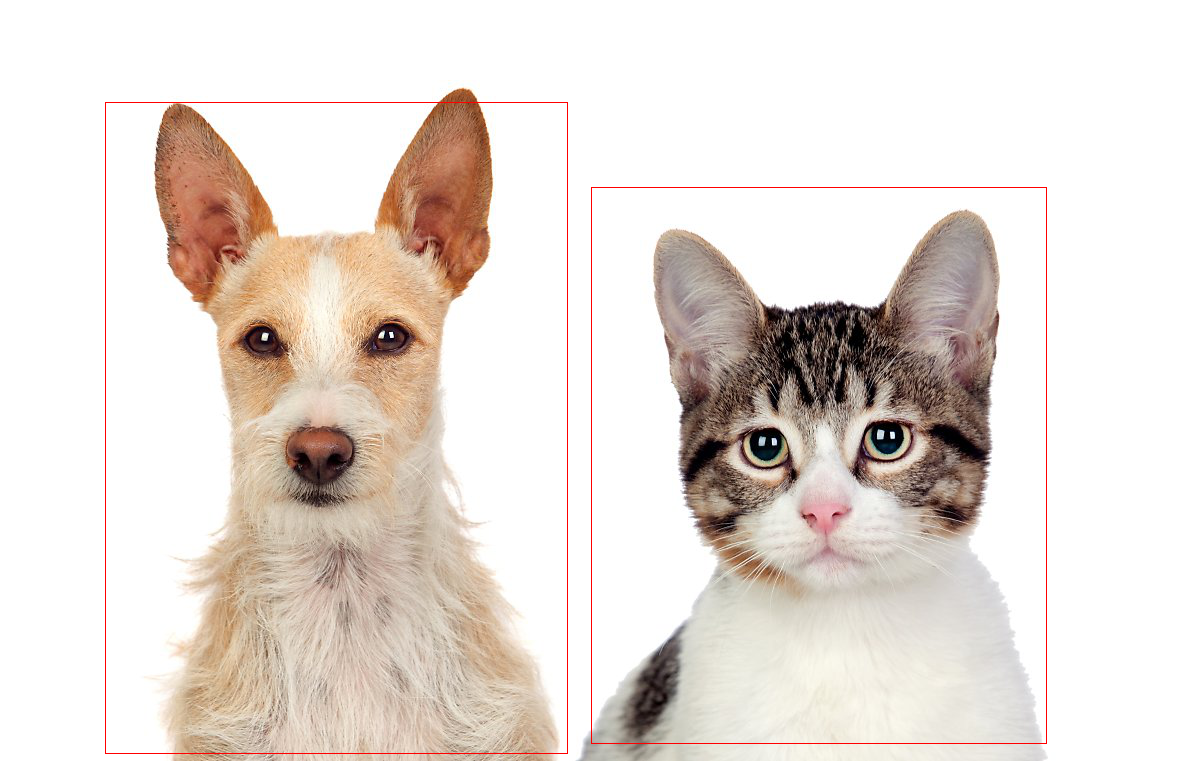

In [43]:
image

## 4) 글자 넣기

In [44]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [45]:
def MakeBox(res):
  objects = res['objects']
  for obj in objects:
    rect = obj['rectangle']
    print(rect)
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)), outline='red')

    objectName = obj['object']
    draw.text((x,y), objectName, fill='red')

In [46]:
MakeBox(result)

{'x': 105, 'y': 102, 'w': 462, 'h': 651}
{'x': 591, 'y': 187, 'w': 455, 'h': 556}


In [47]:
Image

<module 'PIL.Image' from '/usr/local/lib/python3.9/dist-packages/PIL/Image.py'>

## 5) 활용분야 : OCR

- ocr : 글자를 확인해서 입력하게 함

In [48]:
ocr_endpoint = endpoint + 'ocr'

In [49]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"
image = Image.open(BytesIO(requests.get(image_url).content))

In [50]:
headers = {'Ocp-Apim-Subscription-Key': key}
params = {'language':'ko', 'detectOrientation' : 'true'}  #언어를 잘 모를때에는 'unk'로 입력하면 된다.
data = {'url' : image_url}

In [51]:
response = requests.post(ocr_endpoint, headers=headers, params=params, json=data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}]}

In [52]:
for reg in result['regions']:
  print(reg)

{'boundingBox': '45,125,95,36', 'lines': [{'boundingBox': '45,125,95,17', 'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'}, {'boundingBox': '95,125,45,17', 'text': '번영의'}]}, {'boundingBox': '70,144,46,17', 'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}


In [54]:
for reg in result['regions']:
  for line in reg['lines']:
    for word in line['words']:
      print(word)

{'boundingBox': '45,125,46,17', 'text': '평화와'}
{'boundingBox': '95,125,45,17', 'text': '번영의'}
{'boundingBox': '70,144,46,17', 'text': '한반도'}


- 여기서 글자만 보고 싶을 때

In [55]:
for reg in result['regions']:
  for line in reg['lines']:
    for word in line['words']:
      print(word['text'])

평화와
번영의
한반도
